In [ ]:
pip install lime

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import shap
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read 'NIDDK_Pima.csv'
df = pd.read_csv("/content/diabetes.csv")

# Drop NaN value
print("Any null value:", any(df.isnull()))
print("Any NaN value:", any(df.isna()))
print("Before Droping NaN Number of Rows:", len(df))

df = df.dropna()
print("After Droping NaN Number of Rows:", len(df))

df.tail()

Any null value: True
Any NaN value: True
Before Droping NaN Number of Rows: 768
After Droping NaN Number of Rows: 768


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

---
### 1.0.2 Data Balance

In [ ]:
check_num(df)

Class 0: 500
Class 1: 268


Undersample

In [ ]:
df = undersample(df)
check_num(df)

Class 0: 268
Class 1: 268


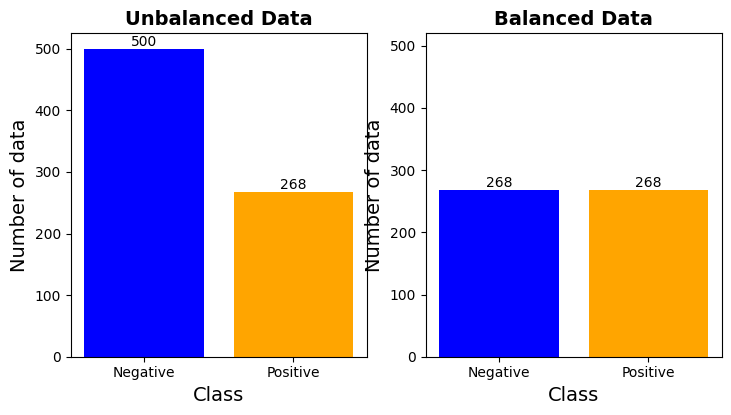

In [ ]:
plt.figure(figsize = (8.4, 4.2))

plt.subplot(1, 2, 1)
x = ["Negative", "Positive"]
h = [500,268]
c = ['blue', 'orange']
bars = plt.bar(x, height = h, color = c)
plt.bar_label(bars)
plt.xlabel("Class", size=14)
plt.ylabel("Number of data", size=14)
plt.title("Unbalanced Data", size=14, fontweight='bold')


plt.subplot(1, 2, 2)
x = ["Negative", "Positive"]
h = [268,268]
c = ['blue', 'orange']
bars = plt.bar(x, height = h, color = c)
plt.bar_label(bars)
plt.ylim(0, 520)
plt.xlabel("Class", size=14)
plt.ylabel("Number of data", size=14)
plt.title("Balanced Data", size=14, fontweight='bold')


plt.show()

### 1.0.3 Data Scaling

Before Scaling

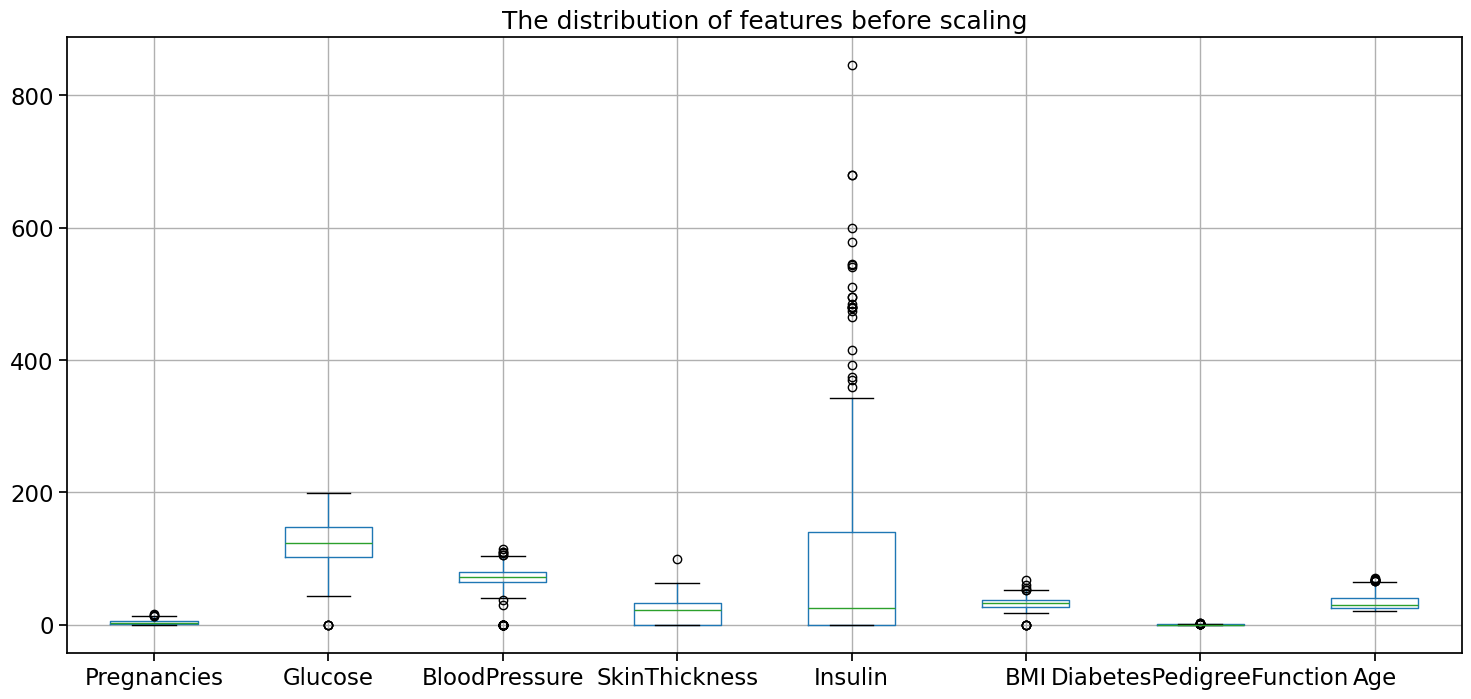

In [ ]:
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  df.boxplot(column=df.columns.values.tolist()[:-1])
  plt.title("The distribution of features before scaling")

After scaling

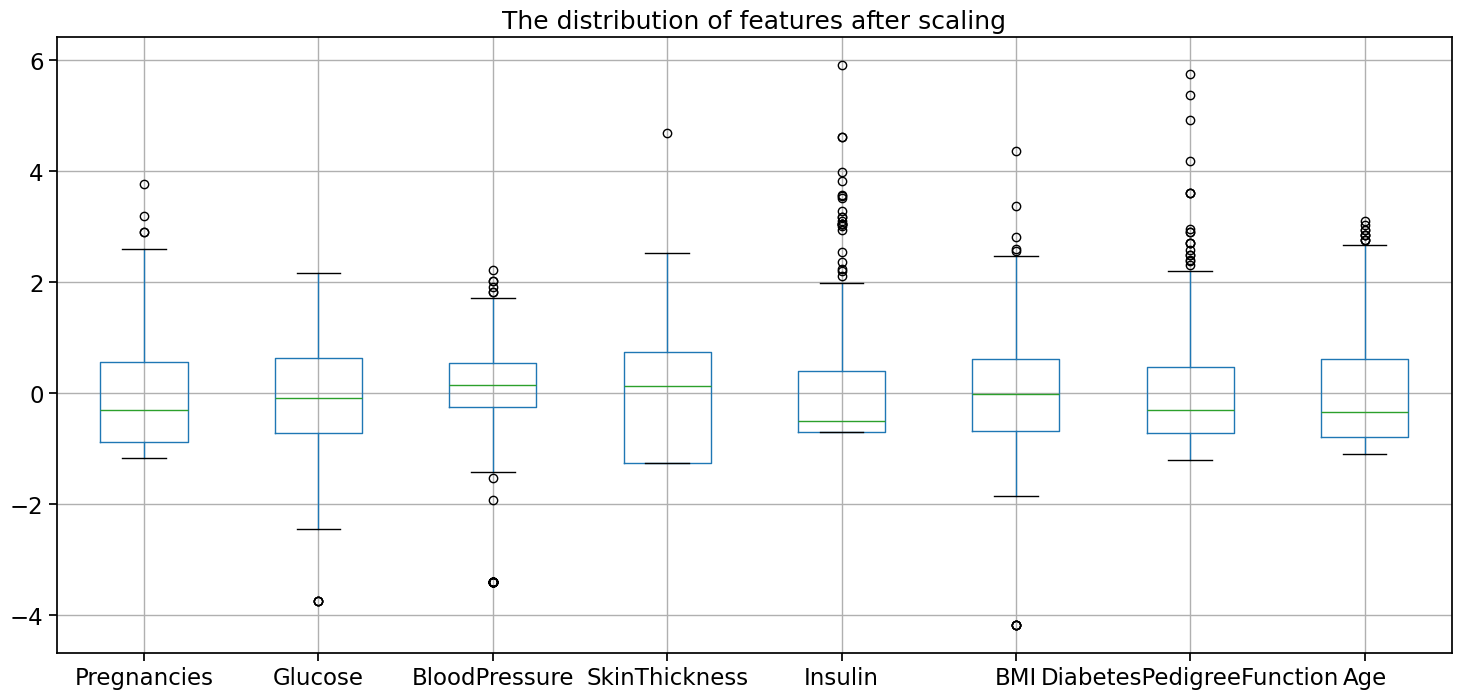

In [ ]:
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  data_scaling_plot(df).boxplot(column=df.columns.values.tolist()[:-1])
  plt.title("The distribution of features after scaling")

In [ ]:
df['Outcome'].unique()


array([1, 0])

In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.86      0.85        65
           1       0.87      0.86      0.86        69

    accuracy                           0.86       134
   macro avg       0.86      0.86      0.86       134
weighted avg       0.86      0.86      0.86       134



In [ ]:
#Random Forest Feature Importance
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
1                   Glucose    0.211500
5                       BMI    0.189753
7                       Age    0.152495
6  DiabetesPedigreeFunction    0.125120
2             BloodPressure    0.089408
0               Pregnancies    0.084999
4                   Insulin    0.076384
3             SkinThickness    0.070340


In [ ]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    mode="classification"
)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


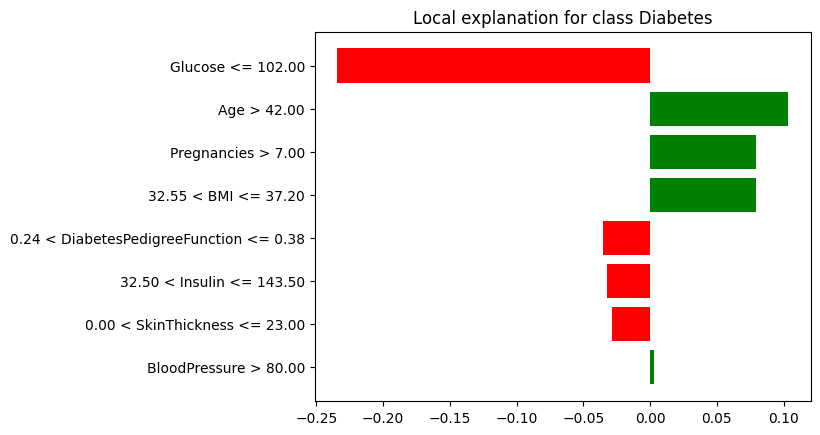

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


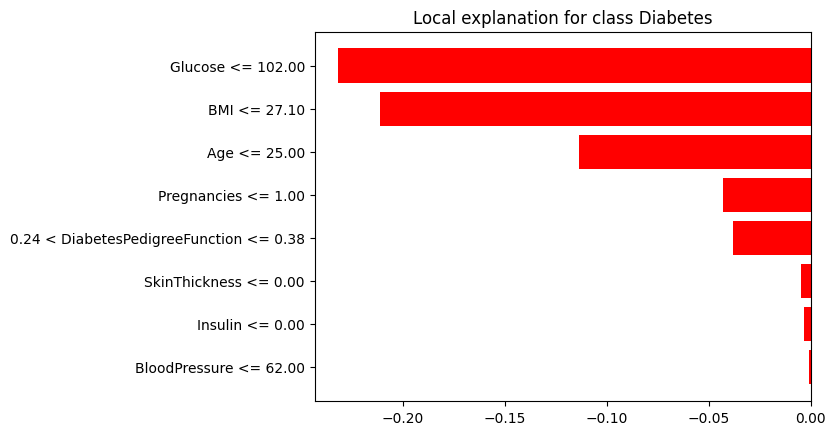

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


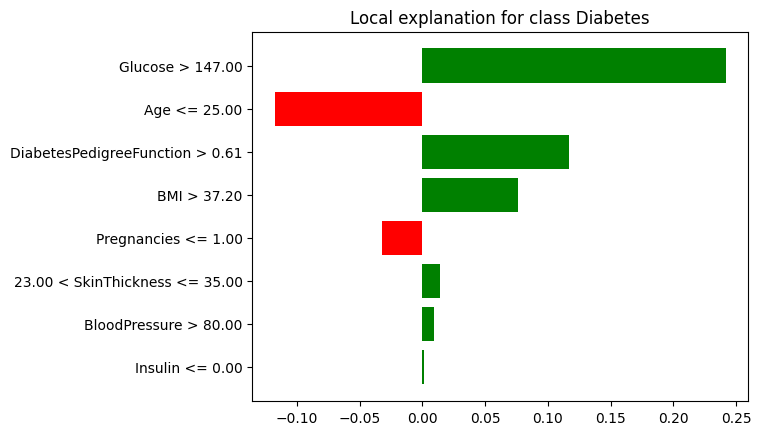

In [ ]:
for i in range(1,4):
    exp = explainer_lime.explain_instance(X_test.iloc[i].values, model.predict_proba, num_features=8)
    exp.show_in_notebook(show_table=True, show_all=False)
    exp.as_pyplot_figure()
    plt.show()

ExactExplainer explainer: 135it [00:19,  3.48it/s]


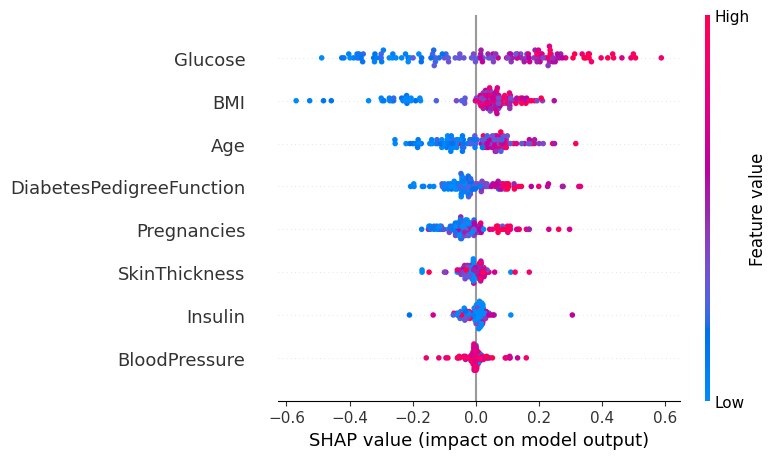

In [ ]:
 explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)



ExactExplainer explainer: 135it [00:18,  3.22it/s]


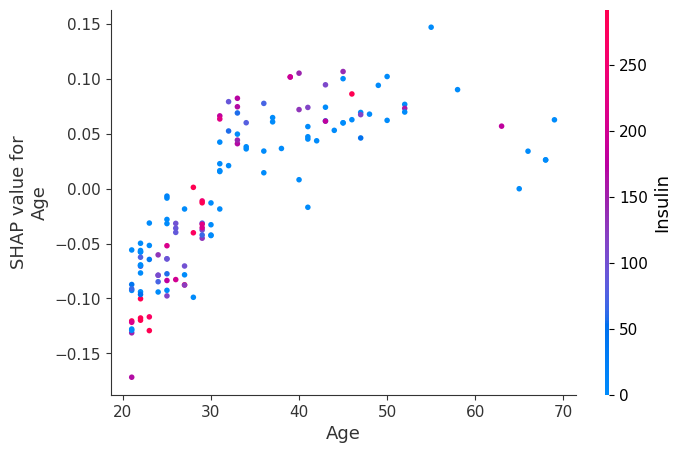

In [ ]:
explainer = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer(X_test)

shap.dependence_plot("Age", shap_values.values[:, :, 1], X_test)